In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/dataset-delevery.csv")


In [ ]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='str')

In [3]:
df.shape

(1000, 9)

In [4]:
df.head(10)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
5,679,19.40,Clear,Low,Evening,Scooter,8,9.0,57
6,627,9.52,Clear,Low,NaN,Bike,12,1.0,49
7,514,17.39,Clear,Medium,Evening,Scooter,5,6.0,46
8,860,1.78,Snowy,Low,Evening,Car,20,6.0,35
9,137,10.62,Foggy,Low,Evening,Scooter,29,1.0,73


-  <H4> Nume </H4> 
'Order_ID', 'Distance_km', 
        'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'
-   <H4> Categorie </H4>  'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type'

In [27]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Weather                 1000 non-null   str    
 2   Traffic_Level           1000 non-null   str    
 3   Time_of_Day             1000 non-null   str    
 4   Vehicle_Type            1000 non-null   str    
 5   Preparation_Time_min    1000 non-null   int64  
 6   Courier_Experience_yrs  1000 non-null   float64
 7   Delivery_Time_min       1000 non-null   int64  
 8   null_count              1000 non-null   int64  
dtypes: float64(2), int64(3), str(4)
memory usage: 70.4 KB


In [6]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [26]:
#  Duplicates check
duplicate_count = df.duplicated(subset=['Order_ID']).sum()
print(f"Total Duplicate Orders: {duplicate_count}")
print(f"Duplicate rows: {df.duplicated().sum()}")
# Check for Nulls
print("Missing values per column:")
print(df.isnull().sum())

KeyError: Index(['Order_ID'], dtype='str')

In [ ]:
df.drop(columns={'Order_ID'},inplace=True)

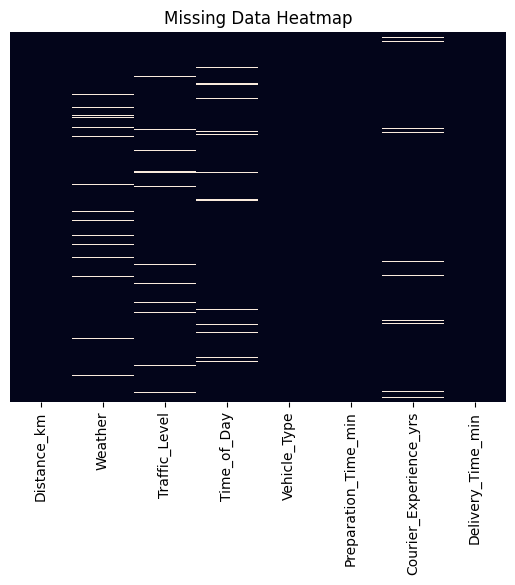

Distance_km               0.0
Weather                   3.0
Traffic_Level             3.0
Time_of_Day               3.0
Vehicle_Type              0.0
Preparation_Time_min      0.0
Courier_Experience_yrs    3.0
Delivery_Time_min         0.0
dtype: float64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.isnull(), cbar=False, yticklabels=False, )
plt.title("Missing Data Heatmap")
plt.show()
print(df.isnull().mean() * 100)


In [10]:
df.count()

Distance_km               1000
Weather                    970
Traffic_Level              970
Time_of_Day                970
Vehicle_Type              1000
Preparation_Time_min      1000
Courier_Experience_yrs     970
Delivery_Time_min         1000
dtype: int64

In [12]:
for i in ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']:
    print(i, df[i].unique())

Weather <StringArray>
['Windy', 'Clear', 'Foggy', 'Rainy', 'Snowy', nan]
Length: 6, dtype: str
Traffic_Level <StringArray>
['Low', 'Medium', 'High', nan]
Length: 4, dtype: str
Time_of_Day <StringArray>
['Afternoon', 'Evening', 'Night', 'Morning', nan]
Length: 5, dtype: str
Vehicle_Type <StringArray>
['Scooter', 'Bike', 'Car']
Length: 3, dtype: str


In [14]:
mask = df[['Weather', 'Traffic_Level', 'Time_of_Day', 'Courier_Experience_yrs']].isna().any(axis=1)

df[mask]


,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
6,9.52,Clear,Low,NaN,Bike,12,1.0,49
14,2.80,Clear,High,Morning,Scooter,10,NaN,33
24,11.20,Clear,Medium,Morning,Bike,23,NaN,73
42,0.99,NaN,Medium,Evening,Bike,15,NaN,32
71,4.17,NaN,Low,Evening,Scooter,5,1.0,22
...,...,...,...,...,...,...,...,...
974,11.68,Clear,NaN,Afternoon,Scooter,25,7.0,70
976,8.96,Snowy,NaN,Morning,Car,6,5.0,51
987,7.44,Rainy,Low,Evening,Bike,27,NaN,53
988,14.39,Rainy,Medium,Morning,Scooter,6,NaN,50


In [ ]:


trap_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Courier_Experience_yrs']

df['null_count'] = df[trap_cols].isnull().sum(axis=1)

print(df['null_count'])
#  it count for each line the  number of nan nun values then we the value count do calculate the sum of them 

# Summary of the pattern
print(df['null_count'].value_counts())


# 0 883 with 0 nan, 114 with only 1 nan and 3 with 2 nan , so there is no row with 4 nan  

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: null_count, Length: 1000, dtype: int64
null_count
0    883
1    114
2      3
Name: count, dtype: int64


In [ ]:
# replace categorical wth the mode the mode gives as a serie thats way we use the index 0 and the mean for the experience years column

for i in  ['Weather', 'Traffic_Level', 'Time_of_Day']:
    replace_value = df[i].mode()[0]
    df[i]= df[i].fillna(value=replace_value)



median_value = df['Courier_Experience_yrs'].mode()[0]
df['Courier_Experience_yrs']= df['Courier_Experience_yrs'].fillna(value=median_value)




In [29]:
df.drop(columns={'null_count'},inplace=True)

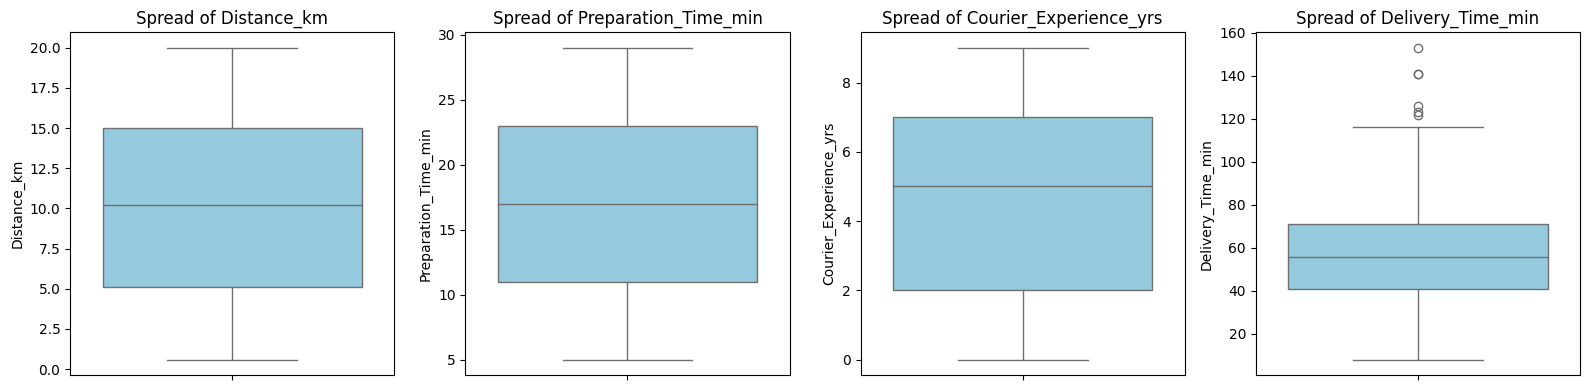

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots for our numerical columns
cols_to_plot = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']
plt.figure(figsize=(16, 4))

for i, col in enumerate(cols_to_plot):
    plt.subplot(1, 4, i+1)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Spread of {col}')

plt.tight_layout()
plt.show()

In [31]:
Q1 = df['Delivery_Time_min'].quantile(0.25)
Q3 = df['Delivery_Time_min'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Delivery_Time_min'] < lower_bound) | (df['Delivery_Time_min'] > upper_bound)]
print(f"Number of outliers in Delivery Time: {len(outliers)}")
print(f"Anything above {upper_bound:.2f} mins is statistically an outlier.")

Number of outliers in Delivery Time: 6
Anything above 116.00 mins is statistically an outlier.


In [35]:
# check if the the data is 

cols = ['Weather', 'Traffic_Level', 'Vehicle_Type']
# we only worry if a category drops below 2-3%.
for i in cols:
    print(i, df[i].value_counts(normalize=True)*100)

Weather Weather
Clear    50.0
Rainy    20.4
Foggy    10.3
Snowy     9.7
Windy     9.6
Name: proportion, dtype: float64
Traffic_Level Traffic_Level
Medium    42.0
Low       38.3
High      19.7
Name: proportion, dtype: float64
Vehicle_Type Vehicle_Type
Bike       50.3
Scooter    30.2
Car        19.5
Name: proportion, dtype: float64


In [32]:
outliers = df[df['Delivery_Time_min'] > 116]
display(outliers)

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
29,18.05,Clear,Medium,Evening,Scooter,10,7.0,123
127,18.97,Clear,Low,Evening,Car,25,4.0,141
379,18.46,Clear,Medium,Morning,Scooter,29,1.0,153
452,15.64,Rainy,Low,Morning,Bike,20,4.0,141
784,14.83,Rainy,Low,Morning,Car,19,4.0,126
924,17.81,Windy,High,Evening,Bike,21,4.0,122


In [21]:
# Next step replacing the nan @@ strategic imputation mean, mode or median depanding on the case 
# for the outliers I will keep them based on the search I did they are logical for the lang distance delevery the model need to learn about them 

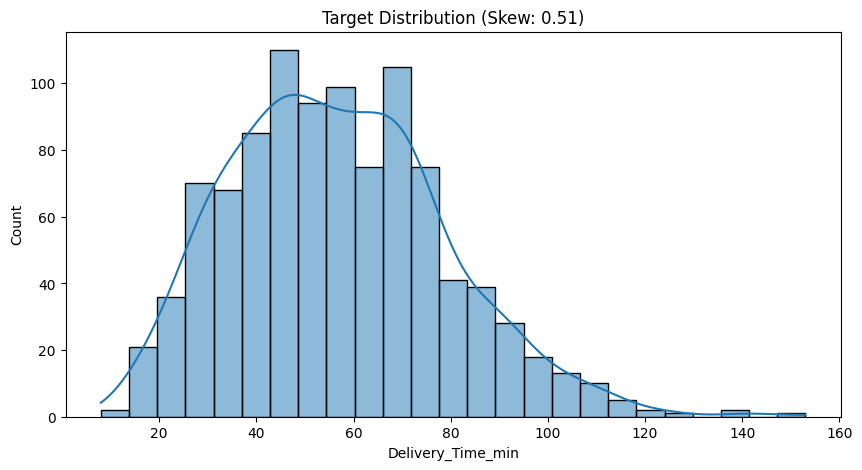

In [46]:
# skewness of the target 

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.histplot(df['Delivery_Time_min'], kde=True)
plt.title(f"Target Distribution (Skew: {df['Delivery_Time_min'].skew():.2f})")
plt.show()

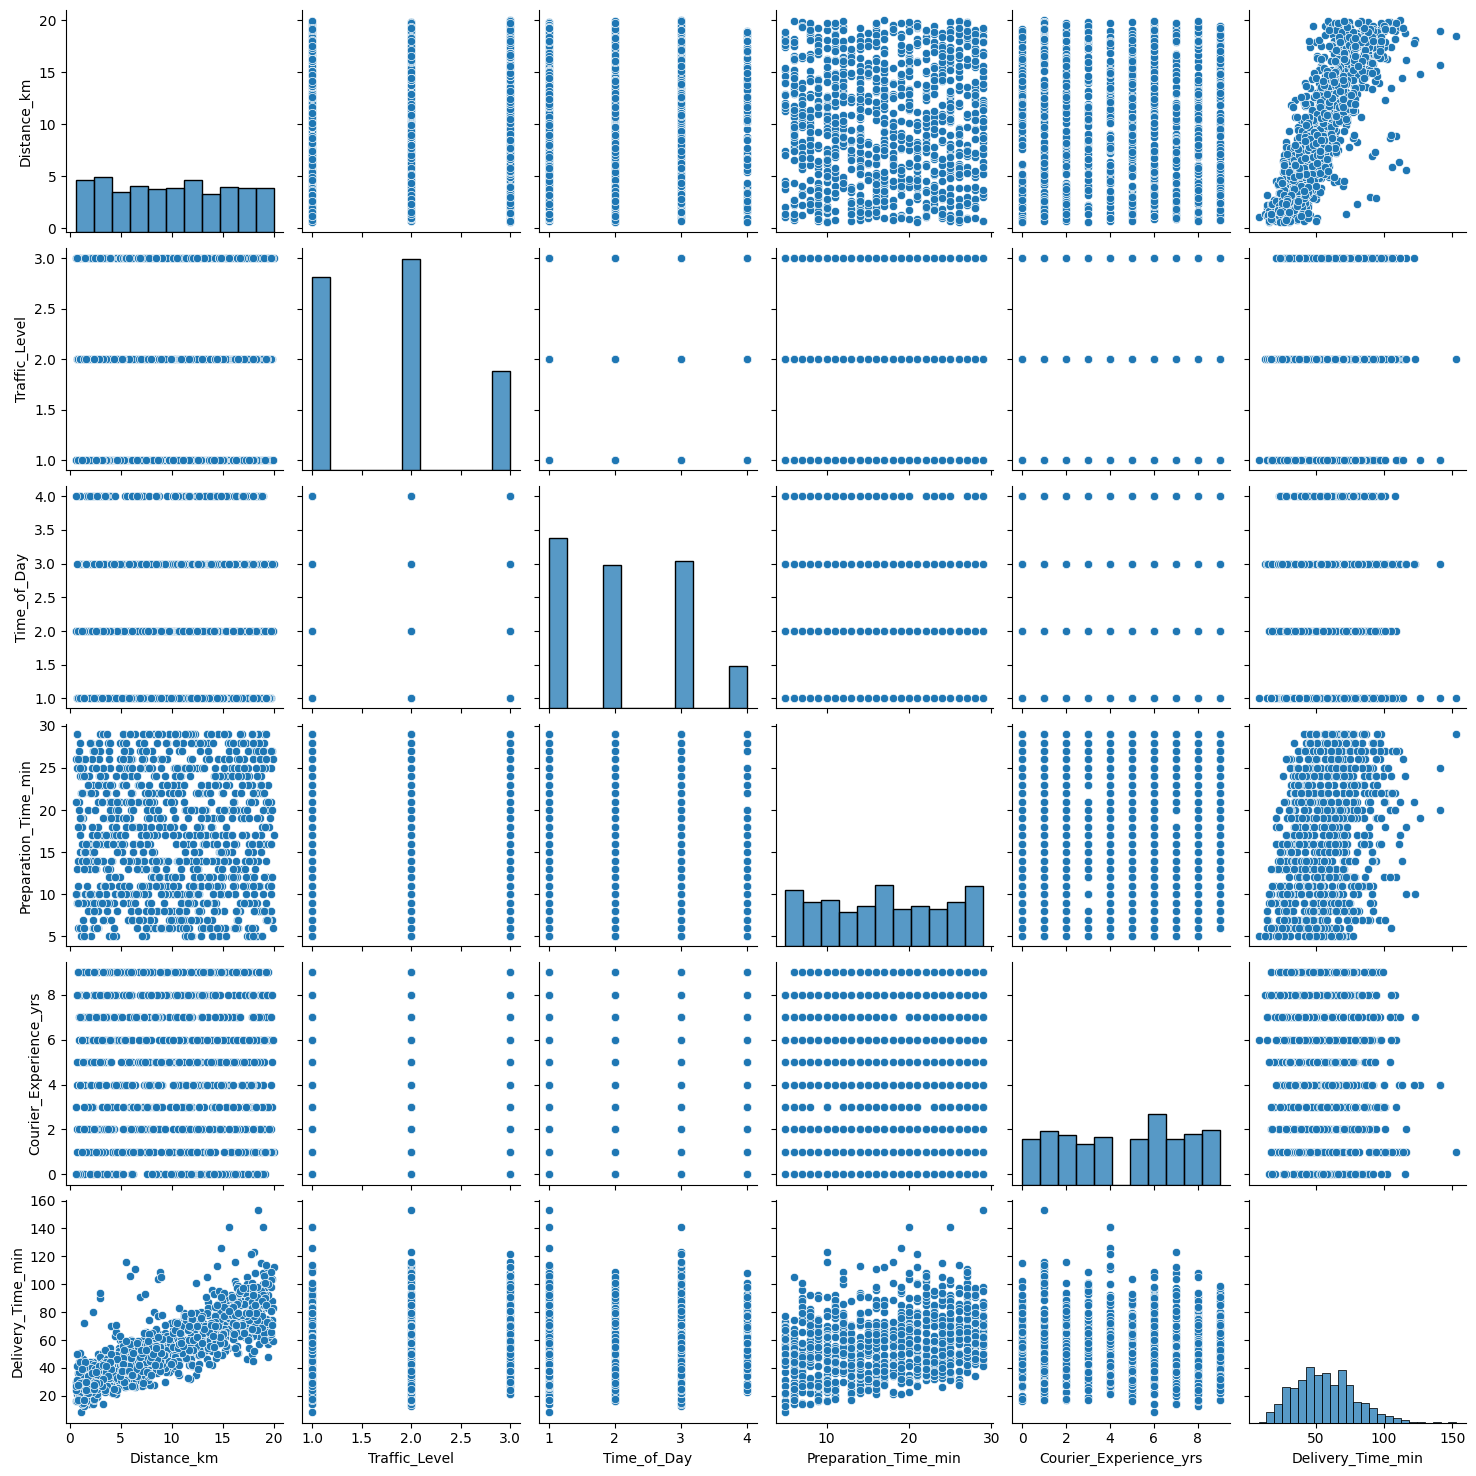

In [45]:
sns.pairplot(df)


In [44]:
data=df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']]
data.corr()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
Distance_km,1.000000,-0.009037,-0.007091,0.780998
Preparation_Time_min,-0.009037,1.000000,-0.031922,0.307350
Courier_Experience_yrs,-0.007091,-0.031922,1.000000,-0.088996
Delivery_Time_min,0.780998,0.307350,-0.088996,1.000000


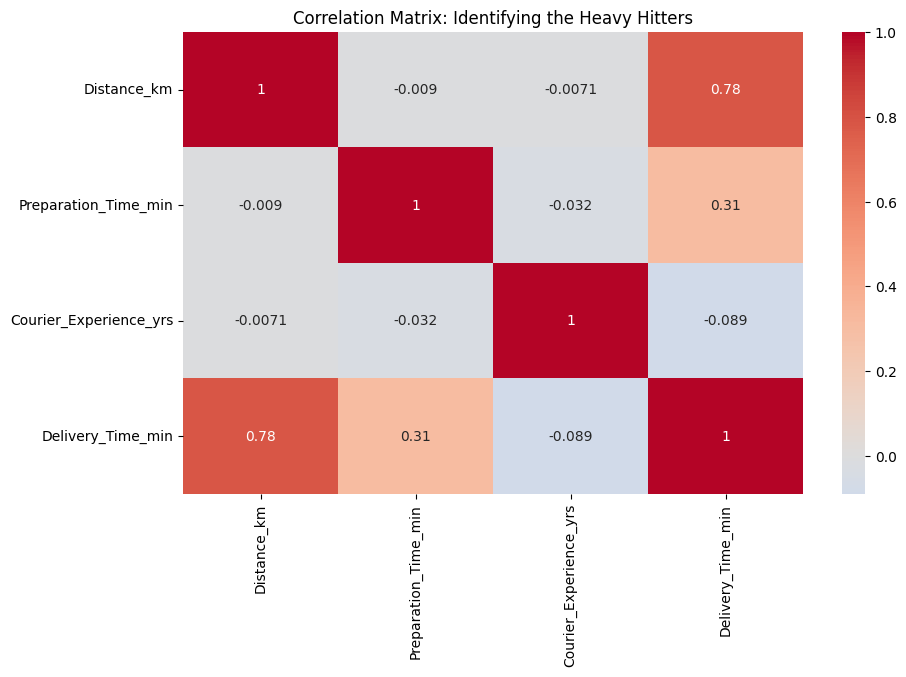

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# We only correlate numbers
numerical_cols = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']

plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix: Identifying the Heavy Hitters")
plt.show()

In [36]:
# Mapping Traffic Level
traffic_mapping = {'Low': 1, 'Medium': 2, 'High': 3, 'Jam': 4}
df['Traffic_Level'] = df['Traffic_Level'].map(traffic_mapping)

# Mapping Time of Day
time_mapping = {'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4}
df['Time_of_Day'] = df['Time_of_Day'].map(time_mapping)

In [37]:
# By using drop_first=True in your delivery time model:

# You have fewer columns, which makes the model faster.

# You avoid mathematical errors caused by redundant data.

# Your results are easier to interpret because every weather condition is compared to one "default" weather type.

categorical_col = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
df_encoded = pd.get_dummies(df, columns=categorical_col, drop_first=True)